In [1]:
#Import the main libraries (numpy, pandas, seaborn, matplotlib)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
path = (r'C:\Users\Divya\OneDrive\Desktop\My Docs\602\homework 2\multiTimeline.xlsx')
xl = pd.read_excel(path)

In [3]:
#Check the information about the data.
df = pd.DataFrame(xl)
df.info

<bound method DataFrame.info of          Month  Diet  Gym  Finance
0   2004-01-01   100   31       48
1   2004-02-01    75   26       49
2   2004-03-01    67   24       47
3   2004-04-01    70   22       48
4   2004-05-01    72   22       43
..         ...   ...  ...      ...
163 2017-08-01    46   52       43
164 2017-09-01    44   50       47
165 2017-10-01    44   47       45
166 2017-11-01    41   47       47
167 2017-12-01    39   45       56

[168 rows x 4 columns]>

In [4]:
#Convert the 'month' column into a ‘DateTime’
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.dtypes

Diet       int64
Gym        int64
Finance    int64
dtype: object

In [5]:
#Check with ‘df.head()’
df.head()

,Diet,Gym,Finance
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


Text(0.5, 0, 'Year')

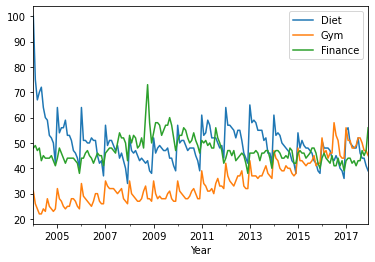

In [6]:
#Visualize the data with matplotlib.
df.plot()
plt.xlabel('Year')

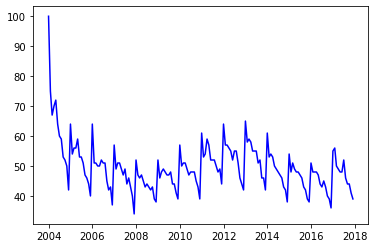

In [7]:
#Plot diet only.
plt.plot(df['Diet'],'b')

Text(0.5, 0, 'Year')

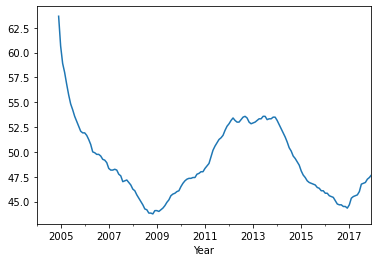

In [8]:
#Use the rolling average of ‘diet’ using pandas’ ‘rolling’ method.
df['Diet'].rolling(12).mean().plot()
plt.xlabel('Year')

<AxesSubplot:xlabel='Month'>

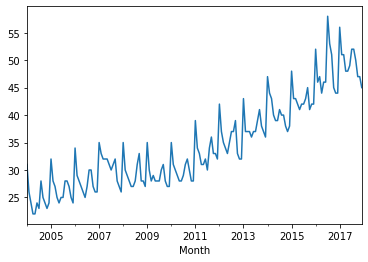

In [9]:
#Do the same with ‘gym’.
df['Gym'].plot()

<AxesSubplot:xlabel='Month'>

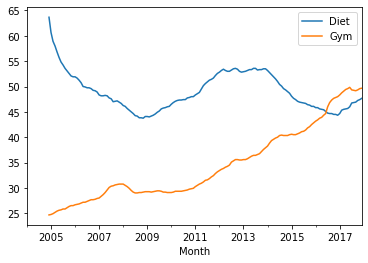

In [10]:
#Plot the trend of both ‘diet’ and ‘gym’.
pd.concat([df['Diet'].rolling(12).mean(),df['Gym'].rolling(12).mean()], axis=1).plot()

Text(0.5, 0, 'Year')

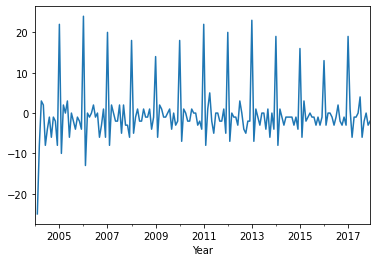

In [11]:
df['Diet'].diff().plot()
plt.xlabel('Year')

In [12]:
#Check the correlation among the variables.
df.corr()

,Diet,Gym,Finance
Diet,1.000000,-0.100764,-0.034639
Gym,-0.100764,1.000000,-0.284279
Finance,-0.034639,-0.284279,1.000000


Text(0.5, 0, 'Year')

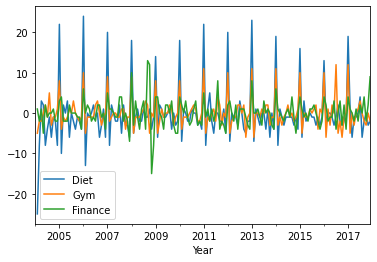

In [13]:
#plotting the first-order differences with the help of .diff() and .plot().
df.diff().plot()
plt.xlabel('Year')

In [14]:
#Now, compute the correlation coefficients of the first-order differences of these time series.
df.diff().corr()

,Diet,Gym,Finance
Diet,1.000000,0.758707,0.373828
Gym,0.758707,1.000000,0.301111
Finance,0.373828,0.301111,1.000000


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

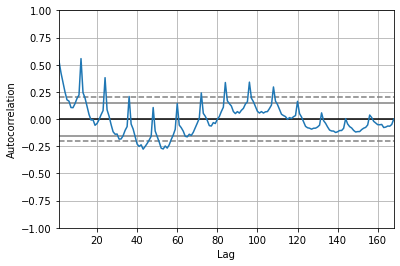

In [15]:
#autocorrelation_plot() function
from pandas.plotting import autocorrelation_plot
pd.plotting.autocorrelation_plot(df['Diet'])

In [16]:
#Dotted lines represents the statistical significance of the correlation.

Text(0.5, 0, 'Year')

<Figure size 432x288 with 0 Axes>

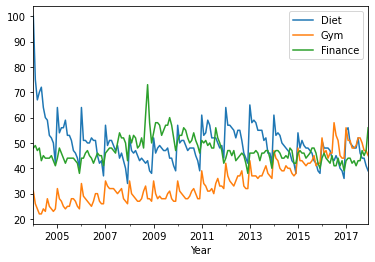

In [17]:
plt.figure()
df.plot()
plt.xlabel('Year')

In [18]:
#Seasonality : Data trends similarly at regular intervals of time. This characteristic feature of data is called seasonality